In [7]:
# Importing Necessory packages:
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import cv2

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Utils
import h5py 

## Loading the Images and Masks:

In [2]:
data = h5py.File("Dataset_2/image_dataset.hdf5", "r")

In [3]:
Images = data["train 2ch frames"][:,:,:,:]
Masks = data["train 2ch masks"][:,:,:,:]

In [4]:
print(Images.shape, Masks.shape)

(900, 384, 384, 1) (900, 384, 384, 1)


In [7]:
Images[0].shape

(384, 384, 1)

## Visualization of Images:

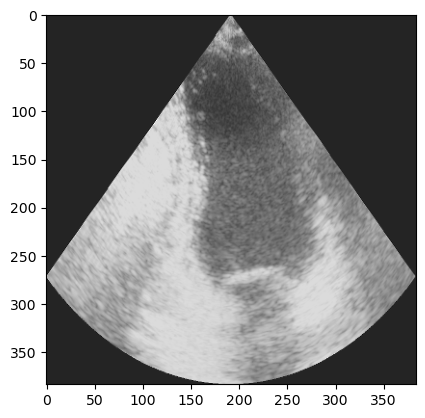

In [12]:
plt.imshow(Images[0],cmap ='gray')

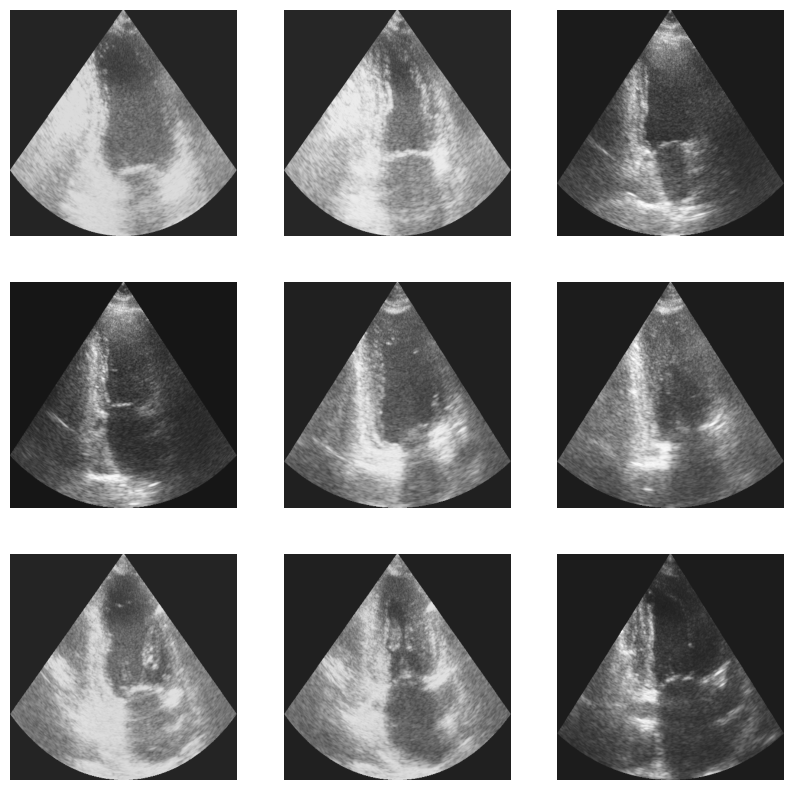

In [14]:
# Visualization of masks:
#Input_images = os.listdir('write_dir/Mitotic_fig/masks')
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
# Loop through the first 9 images:
for i, image_file in enumerate(Images[:9]):
    # Display the image
    axes[i].imshow(image_file,cmap='gray')
    axes[i].axis('off')
    #axes[i].set_title("size-{}".format(image.shape))

## Visualization of ground truth of masks:

Endocardium and epicardium of the left ventricle and left atrium wall are shown respectively
in blue, green and yellow. in below masks.

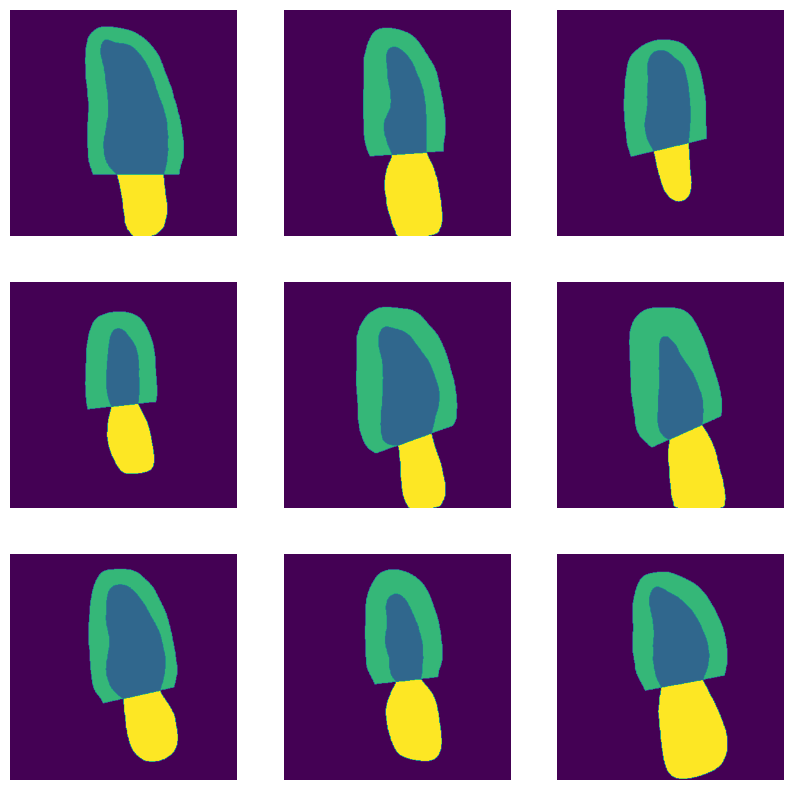

In [16]:
# Visualization of masks:
#Input_images = os.listdir('write_dir/Mitotic_fig/masks')
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
# Loop through the first 9 images:
for i, image_file in enumerate(Masks[:9]):
    # Display the image
    axes[i].imshow(image_file)
    axes[i].axis('off')
    #axes[i].set_title("size-{}".format(image.shape))

In [9]:
type(Images)

numpy.ndarray

## Preprocessing:

In [8]:
# Define Gaussian blur kernel size and sigma
kernel_size = (5, 5)  # Kernel size
sigma = 1.0  # Standard deviation for the Gaussian kernel

# Iterate through each image and apply Gaussian blur
preprocessed_images = np.empty_like(Images)  # Create an empty array to store blurred images

for i in range(Images.shape[0]):
    # Extract the 2D image from the 3D shape (384, 384, 1)
    image = Images[i, :, :, 0]
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    
    # Store the blurred image back in the array
    preprocessed_images[i, :, :, 0] = blurred_image

print("Gaussian blur applied to all images successfully.")

Gaussian blur applied to all images successfully.


In [10]:
preprocessed_images.shape

(900, 384, 384, 1)

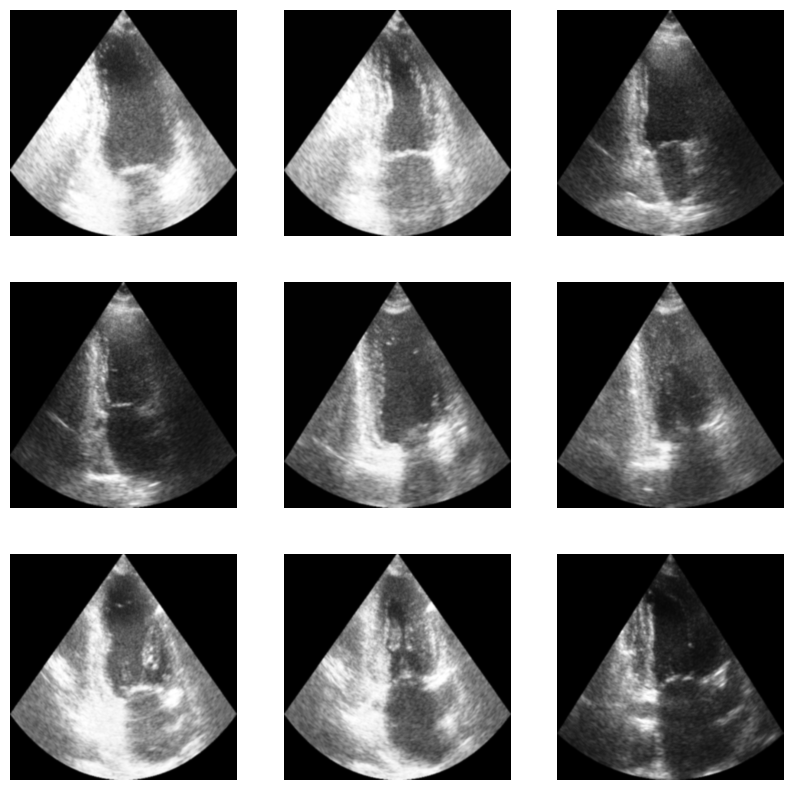

In [15]:
# Visualization of masks:
#Input_images = os.listdir('write_dir/Mitotic_fig/masks')
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
# Loop through the first 9 images:
for i, image_file in enumerate(preprocessed_images[:9]):
    # Display the image
    axes[i].imshow(image_file,cmap='gray')
    axes[i].axis('off')
    #axes[i].set_title("size-{}".format(image.shape))